## Problem Statement

---

The objective of this project i sto analyze the cost of livings in different regions of the world. Some key points to focus - 



*   Analyze the amount of money to survive in different geographical areas. 
*   Comparing the cost of living in different cities.
*   Geo spatial analysis.
*   Analyze the cheapest and most expensive places of the world.
*   Ranking places based on living cost. 
*   Comparing lifestyles of Canadian cities.
*   Analyzing cost of living.
*   Recommending better places to live. 


In [71]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import folium
from folium import Circle
from geopy import Nominatim

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [72]:
city = pd.read_csv('cost-of-living.csv')

In [73]:
city.shape

(55, 161)

The dataset has 55 rows and 161 columns.

In [74]:
city.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon","Austin, TX, United States",...,"Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,5.25,1.99,1.94,1.94,4.77,15.0,5.75,5.88,3.57,4.50,5.63,13.75,1.92,13.75,15.0,5.39,5.65,15.0,15.0,5.10,10.0,11.00,6.14,13.0,6.12,4.84,15.0,8.5,8.98,13.48,...,15.54,5.23,3.61,2.53,4.87,4.56,1.78,3.80,17.96,6.34,3.16,11.40,5.99,8.93,6.29,4.45,4.72,10.31,6.58,10.45,15.0,8.80,5.10,11.19,23.12,4.70,3.56,12.38,2.62,3.82,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,23.86,11.92,15.52,17.50,23.86,55.0,23.94,29.42,20.42,18.76,22.51,42.97,12.78,48.12,65.0,24.62,20.67,50.0,56.5,20.42,35.0,55.00,25.57,50.0,20.42,17.85,65.0,40.0,53.91,44.92,...,64.75,20.91,24.04,10.76,16.25,26.04,23.74,15.19,109.16,38.02,12.66,66.47,20.97,27.95,42.47,20.63,23.61,44.69,28.51,75.97,60.0,36.69,34.01,40.39,92.46,22.54,17.82,49.54,16.40,15.28,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,4.25,5.56,3.88,3.87,4.77,8.0,4.31,4.12,4.08,3.75,3.75,6.87,3.19,6.53,8.0,5.09,3.67,8.7,8.0,4.59,6.5,6.87,4.60,8.0,4.08,4.42,8.0,7.0,7.19,7.19,...,12.95,4.18,3.91,3.79,3.25,4.56,5.04,3.80,11.64,6.34,3.16,7.60,4.94,4.49,6.29,5.16,4.25,6.87,5.92,7.60,8.0,4.40,5.10,6.84,12.94,4.60,2.67,7.43,3.28,3.51,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,1.43,2.38,0.78,0.78,1.91,5.0,1.68,1.47,1.79,0.88,1.13,4.81,1.60,4.12,5.0,1.70,0.94,7.0,5.0,1.28,3.5,4.81,1.53,4.0,1.02,1.50,5.0,3.5,3.22,4.49,...,7.77,1.25,1.77,1.87,1.62,1.30,2.37,2.28,8.73,6.34,2.28,6.55,1.50,1.80,2.36,2.58,1.77,4.81,1.97,6.31,5.8,2.93,1.70,4.97,6.24,1.13,1.25,4.95,2.62,2.75,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,2.39,3.18,1.55,1.36,2.86,4.0,2.39,2.94,1.79,1.29,1.80,5.50,1.60,4.12,4.0,1.95,1.20,6.0,3.0,1.53,4.5,4.81,1.97,4.0,1.53,1.80,4.5,3.1,4.17,5.39,...,7.77,1.67,2.10,3.48,1.95,2.93,4.45,3.92,7.28,6.34,3.54,6.65,1.95,2.70,3.81,2.81,1.65,5.50,3.29,6.17,5.5,2.57,2.55,5.59,5.55,1.69,2.32,5.57,3.44,3.06,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


Each column represents a city and each row represents the price of different items in each city. All prices are Euro.

**Extracting latitude and longitude of geographical areas.**

In [75]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Milan, Italy")

In [76]:
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = 45.4668, Longitude = 9.1905


In [77]:
#transpose the dataframe
city = city.T
city.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, G...",1 min. of Prepaid Mobile Tariff Local (No Disc...,"Internet (60 Mbps or More, Unlimited Data, Cab...","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in Cit...,Price per Square Meter to Buy Apartment Outsid...,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yea...",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641


In [78]:
city.rename(columns=city.iloc[0], inplace = True)
city.drop(city.index[0], inplace = True)
city.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


In [79]:
city = city.reset_index()

city = city.rename(columns={'index': 'Location'})
city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3


In [80]:
import warnings
warnings.filterwarnings('ignore')

from geopy.extra.rate_limiter import RateLimiter

geocode = RateLimiter(locator.geocode, min_delay_seconds=1)


In [81]:
city['location'] = city['Location'].apply(geocode)

city['point'] = city['location'].apply(lambda loc: tuple(loc.point) if loc else None)

city[['latitude', 'longitude', 'altitude']] = pd.DataFrame(city['point'].tolist(), index=city.index)

In [82]:
city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",location,point,latitude,longitude,altitude
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86,"(Санкт-Петербург, Северо-Западный федеральный ...","(59.938732, 30.316229, 0.0)",59.938732,30.316229,0.0
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43,"(İstanbul, Fatih, İstanbul, Marmara Bölgesi, 3...","(41.0096334, 28.9651646, 0.0)",41.009633,28.965165,0.0
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41,"(İzmir, Konak, İzmir, Ege Bölgesi, UNKNWON, Tü...","(38.4147331, 27.1434119, 0.0)",38.414733,27.143412,0.0
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)",60.167488,24.942747,0.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,

In [83]:
#drop unnecessary columns from the data
city = city.drop(['location','point','altitude'], axis = 1)

city.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

## Feature Engineering

Aggregating similar features into a caategory. 6 functions are created to aggregate features like food, travel, living, lifestyle, education and income.

In [84]:
def food(city):
    return int(round((city[['Meal, Inexpensive Restaurant',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'Chicken Breasts (Boneless, Skinless), (1kg)', 'Apples (1kg)', 'Oranges (1kg)',
       'Potato (1kg)', 'Lettuce (1 head)', 'Cappuccino (regular)',
       'Rice (white), (1kg)', 'Tomato (1kg)', 'Banana (1kg)', 'Onion (1kg)',
       'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',]].mean()).mean()))

def travel(city):
    return int(round((city[['One-way Ticket (Local Transport)',
                            'Monthly Pass (Regular Price)', 'Gasoline (1 liter)',
                           'Taxi Start (Normal Tariff)', 'Taxi 1km (Normal Tariff)',
                           'Taxi 1hour Waiting (Normal Tariff)',]].mean()).mean()))

def living(city):
    return int(round((city[[ 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
         'Price per Square Meter to Buy Apartment in City Centre',
       'Price per Square Meter to Buy Apartment Outside of Centre',
        'Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)',]].mean()).mean()))

def lifestyle(city):
    return int(round((city[['1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Tennis Court Rent (1 Hour on Weekend)',
       'Cinema, International Release, 1 Seat',
       '1 Pair of Jeans (Levis 501 Or Similar)',
       '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
       '1 Pair of Nike Running Shoes (Mid-Range)',
       '1 Pair of Men Leather Business Shoes', 
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',]].mean()).mean()))

def education(city):
    return int(round((city[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       'International Primary School, Yearly for 1 Child',]].mean()).mean()))

def income(city):
    return int(round((city[['Average Monthly Net Salary (After Tax)',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',]].mean()).mean()))

In [85]:
city['Food'] = city.apply(food, axis = 1)
city['Travel'] = city.apply(travel, axis = 1)
city['Living'] = city.apply(living, axis = 1)
city['Lifestyle'] = city.apply(lifestyle, axis = 1)
city['Education'] = city.apply(education, axis = 1)
city['Income'] = city.apply(income, axis = 1)

In [86]:
city.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",latitude,longitude,Food,Travel,Living,Lifestyle,Education,Income
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.4,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86,59.938732,30.316229,2,8,5020,34,2900,328
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.2,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43,41.009633,28.965165,2,6,5409,23,3594,228
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.2,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41,38.414733,27.143412,2,5,5297,19,2580,207
3,"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6,1,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641,60.167488,24.942747,4,20,6985,44,996,1192
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.1,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3,47.024512,28.832292,2,2,4040,32,1445,148


Extract country name from Location columns with split function.

In [87]:
city['country'] = city['Location'].str.split(', ')

city['Country'] = city['country'].apply(lambda x: x[1])

city['Country'].value_counts()

India        11
Canada        8
Poland        6
Australia     5
Romania       5
             ..
Estonia       1
Qatar         1
Sri Lanka     1
Taiwan        1
Thailand      1
Name: Country, Length: 90, dtype: int64

## Comparing lifestyle in different countries

In [88]:
#groupby the Countries with Lifestyle Factors

city[['Country','Food','Travel',
      'Living','Lifestyle','Education','Income']].groupby(['Country']).agg('mean').style.background_gradient(cmap = 'Wistia')

,Food,Travel,Living,Lifestyle,Education,Income
Country,,,,,,
AZ,4.000000,16.000000,5114.000000,35.000000,7088.000000,1559.000000
Albania,2.000000,5.000000,4157.000000,29.000000,1225.000000,171.000000
Argentina,2.000000,3.000000,4346.000000,28.000000,1638.000000,266.000000
Armenia,2.000000,3.000000,4390.000000,30.000000,1581.000000,154.000000
Australia,4.400000,21.600000,4932.200000,38.600000,5919.400000,1400.800000
Austria,4.000000,14.000000,6662.000000,40.000000,8124.000000,951.000000
Azerbaijan,2.000000,2.000000,4164.000000,32.000000,2933.000000,151.000000
Belarus,2.000000,3.000000,3932.000000,33.000000,2874.000000,224.000000
Belgium,4.000000,15.000000,5773.000000,42.000000,9519.000000,1146.000000


>Here we can see which country is most expecnsive and less expensive in 6 categories. 

>> For Food, Swizerland is most expensive (8 Euro). 

>> UK is most expensive for travelling (37 Euro). 

>> Living in Singapore is most expensive (19,937 Euro). 

>> In terms of lifestyle, both Iceland and Switzerland are most expensive country. 

>> Education is less expensive in India and Nepal. Both NY and Switzerland is expensive for education compared to other countries. 

>> Finally, Switzerland is also the top country in terms of income. In conclusion, although it is more expensive to live in Switzerland in every aspect, it is the country which pay most to it's citizen.

## Top 5 Most Expensive Country in 6 Categories

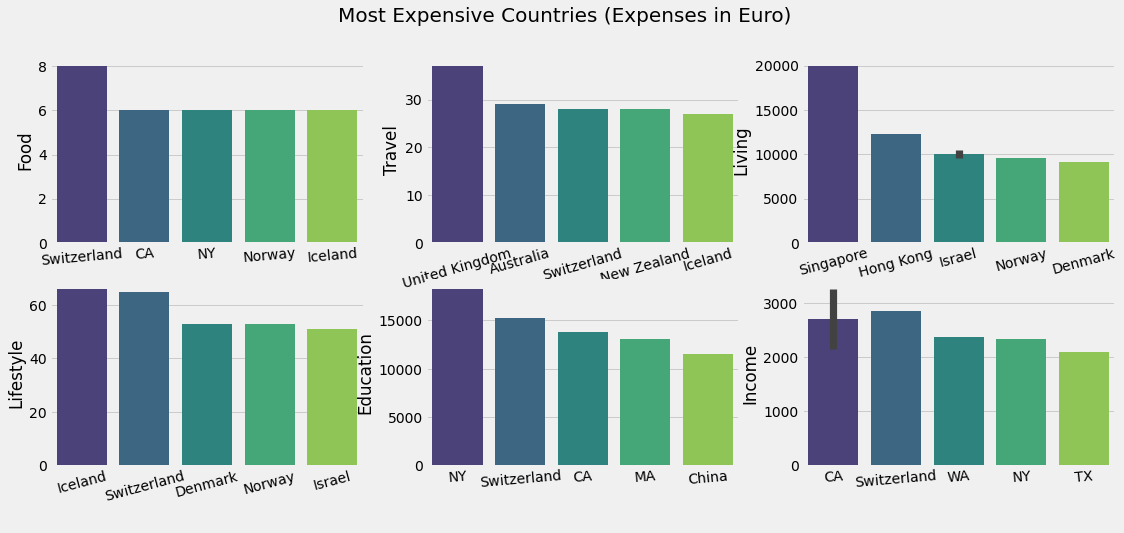

In [89]:
plt.rcParams['figure.figsize'] = (17, 7)

#Food
plt.subplot(2, 3, 1)
x = city[['Country','Food']].sort_values(by = 'Food', ascending = False).head(5)
sns.barplot(x['Country'], x['Food'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

#Travel
plt.subplot(2, 3, 2)
x = city[['Country','Travel']].sort_values(by = 'Travel', ascending = False).head(5)
sns.barplot(x['Country'], x['Travel'], palette = 'viridis')
plt.xticks(rotation = 16)
plt.xlabel(' ')

#Living
plt.subplot(2, 3, 3)
x = city[['Country','Living']].sort_values(by = 'Living', ascending = False).head(6)
sns.barplot(x['Country'], x['Living'], palette = 'viridis')
plt.xticks(rotation = 15)
plt.xlabel(' ')

#Lifestyle
plt.subplot(2, 3, 4)
x = city[['Country','Lifestyle']].sort_values(by = 'Lifestyle', ascending = False).head(5)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'viridis')
plt.xticks(rotation = 15)
plt.xlabel(' ')

#Education
plt.subplot(2, 3, 5)
x = city[['Country','Education']].sort_values(by = 'Education', ascending = False).head(5)
sns.barplot(x['Country'], x['Education'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

#Income
plt.subplot(2, 3, 6)
x = city[['Country','Income']].sort_values(by = 'Income', ascending = False).head(6)
sns.barplot(x['Country'], x['Income'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.suptitle('Most Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()

Switzerland is one of the most expensive countries in the world in terms of food, travel, education, etc. 

## Top 5 Leasr Expensive Countries in 6 Category

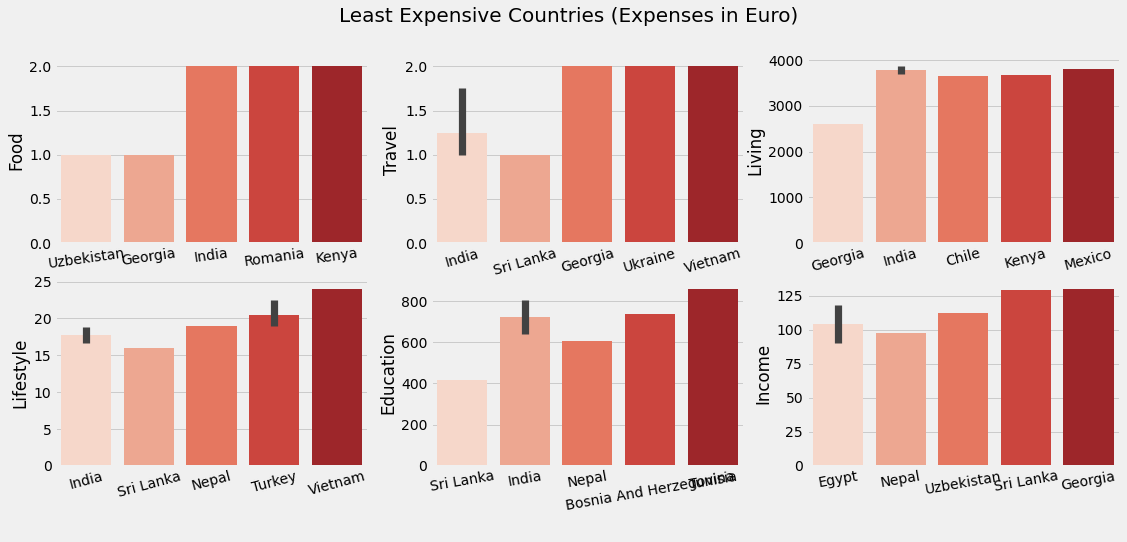

In [90]:
plt.rcParams['figure.figsize'] = (17, 7)

#Food
plt.subplot(2, 3, 1)
x = city[['Country','Food']].sort_values(by = 'Food', ascending = True).head(5)
sns.barplot(x['Country'], x['Food'], palette = 'Reds')
plt.xticks(rotation = 8)
plt.xlabel(' ')

#Travel
plt.subplot(2, 3, 2)
x = city[['Country','Travel']].sort_values(by = 'Travel', ascending = True).head(9)
sns.barplot(x['Country'], x['Travel'], palette = 'Reds')
plt.xticks(rotation = 16)
plt.xlabel(' ')

#Living
plt.subplot(2, 3, 3)
x = city[['Country','Living']].sort_values(by = 'Living', ascending = True).head(9)
sns.barplot(x['Country'], x['Living'], palette = 'Reds')
plt.xticks(rotation = 15)
plt.xlabel(' ')

#Lifestyle
plt.subplot(2, 3, 4)
x = city[['Country','Lifestyle']].sort_values(by = 'Lifestyle', ascending = True).head(18)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'Reds')
plt.xticks(rotation = 15)
plt.xlabel(' ')

#Education
plt.subplot(2, 3, 5)
x = city[['Country','Education']].sort_values(by = 'Education', ascending = True).head(9)
sns.barplot(x['Country'], x['Education'], palette = 'Reds')
plt.xticks(rotation = 10)
plt.xlabel(' ')

#Income
plt.subplot(2, 3, 6)
x = city[['Country','Income']].sort_values(by = 'Income', ascending = True).head(6)
sns.barplot(x['Country'], x['Income'], palette = 'Reds')
plt.xticks(rotation = 10)
plt.xlabel(' ')

plt.suptitle('Least Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()

India is one of the least expensive countries in the world in terms of food, living, lifestyle, education, etc. 

## Geo  Spatial Analysis

In [91]:
top_range = (city.describe().loc['min',:]/city.describe().loc['max',:]).sort_values().index[2:22]
list(top_range)


['Education', 'Travel', 'Income', 'Food', 'Living', 'Lifestyle']

In [92]:
def color_producer(val):
    if val <= city[item].quantile(.25):
        return 'forestgreen'
    elif val <= city[item].quantile(.50):
        return 'goldenrod'
    elif val <= city[item].quantile(.75):
        return 'darkred'
    else:
        return 'red'

Education

In [93]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='Stamen Terrain',
                 zoom_start=2)

item = top_range[0]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Education


Travel

In [94]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='CartoDB dark_matter',
                 zoom_start=2)

item = top_range[1]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Travel


In [95]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='Stamen Toner',
                 zoom_start=2)

item = top_range[2]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Income


Income

In [96]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='Stamen Watercolor',
                 zoom_start=2)

item = top_range[3]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Food


In [97]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='Open Street Map',
                 zoom_start=2)

item = top_range[4]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Living


Living

Lifestyle

In [98]:
map = folium.Map(location=[city['latitude'].mean(),
                           city['longitude'].mean()],
                 tiles='CartoDB Positron',
                 zoom_start=2)

item = top_range[5]

# Add a bubble map to the base map
for i in range(0,len(city)):
    Circle(
        location=[city.iloc[i]['latitude'], city.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(city.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Lifestyle


## Comparing Different Lifestyle Factors

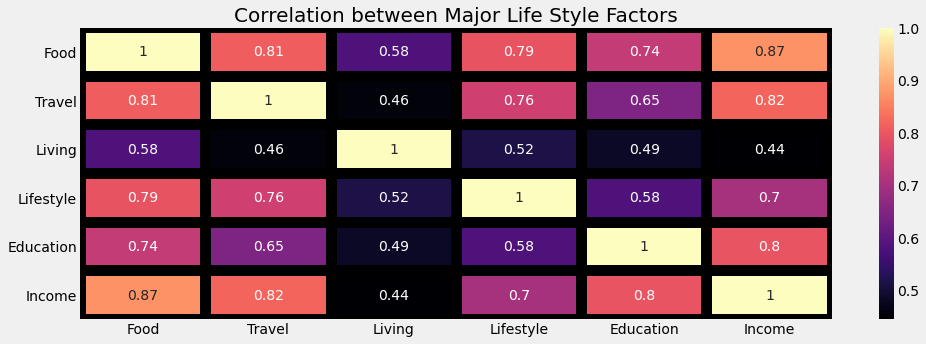

In [99]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(city[['Food','Travel','Living','Lifestyle','Education','Income']].corr(),
            cmap = 'magma', 
            annot = True, linecolor='black', linewidths = 10)
plt.title('Correlation between Major Life Style Factors', fontsize = 20)
plt.show()

Here we see Food is correlated with all the factors except living and it is most correlated with income and travel. Traveling expenses are not correlated with living, but it has a good correlation with income. Living is not correlated with any other factors. Lifestyle is mostly corealated with food and travel. Finally, Education has a good correlation with income.

## Comparing Some of the Most Popular Countries in the World

In [100]:
#considering Germany, Australia, Canada, China and United Kingdom are top 5 popular countries

city[(city['Country'] == 'Germany') | (city['Country'] == 'Australia') | 
     (city['Country'] == 'Canada') | (city['Country'] == 'China') | 
    (city['Country'] == 'United Kingdom')][['Location','Food', 
                'Travel','Living','Lifestyle','Education',
                    'Income']].set_index('Location').sort_values(by = 'Income',
                                ascending = False).style.background_gradient(cmap = 'Greens')

,Food,Travel,Living,Lifestyle,Education,Income
Location,,,,,,
"Brisbane, Australia",5,22,4644,39,4910,1517
"Sydney, Australia",5,29,5781,42,6661,1511
"Calgary, Canada",4,17,4747,36,5599,1480
"Ottawa, Canada",4,17,4818,39,4911,1454
"Melbourne, Australia",4,21,5218,39,7062,1398
"London, United Kingdom",4,37,9069,42,11423,1380
"Adelaide, Australia",4,16,4309,34,4606,1329
"Munich, Germany",4,17,7445,44,5867,1315
"Vancouver, Canada",5,16,6153,38,7471,1315


We see that Australia offers better income compared to other countries. Food is expensive in Australia but travel, lifestyle and other factors are economical.Education in China is too expensive in comparison to other factors. Canada seems quite affordable in every aspects except food costs is high in some provices like BC and Toronto. Living in UK seems expensive in terms of travel, education and living cost. 

## Comparing Lifestyle in Canadian Cities

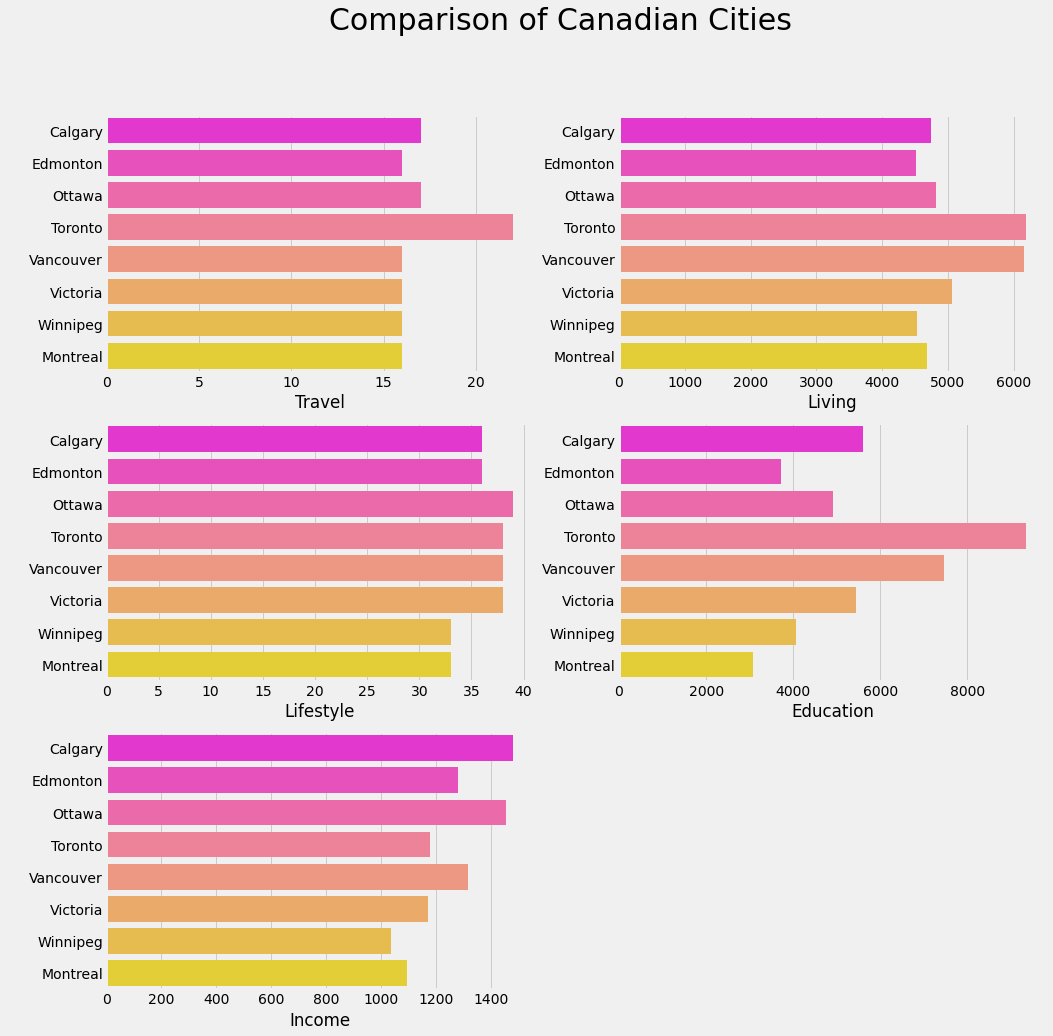

In [101]:
# let's plot the Cnadian Cities to understand them better
city['City'] = city['Location'].str.split(', ')
city['City'] = city['City'].apply(lambda x: x[0])

x = city[city['Country'] == 'Canada']

plt.rcParams['figure.figsize'] = (15, 15)
plt.subplot(3, 2, 1)
sns.barplot(y = x['City'], x = x['Travel'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 2)
sns.barplot(y = x['City'], x = x['Living'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 3)
sns.barplot(y = x['City'], x = x['Lifestyle'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 4)
sns.barplot(y = x['City'], x = x['Education'], palette = 'spring')
plt.ylabel(" ")

plt.subplot(3, 2, 5)
sns.barplot(y = x['City'], x = x['Income'], palette = 'spring')
plt.ylabel(" ")

plt.suptitle('Comparison of Canadian Cities', fontsize = 30)
plt.show()

Calgary and Edmonton are least expensive cities from every aspects of living like food, travel, living, education, lifestyle. Toronto and Vancouver is the most expensive cities in all categoris. In Calgary, people have highest income. Ottawa and Vancouver have got the second and third highest income place. In conclusion, lifestyle in Calgary and Edmonton is less expensive compared to other cities in Canada.

## Ranking cities based on overall living factors

In [102]:
x = city[['Food','Travel','Living','Lifestyle','Education','Income']]
mm = MinMaxScaler() #convert all data into 0 and 1
data = mm.fit_transform(x)
data = pd.DataFrame(data)
data.columns = x.columns
data.head()

,Food,Travel,Living,Lifestyle,Education,Income
0,0.142857,0.194444,0.139139,0.372549,0.139049,0.074890
1,0.142857,0.138889,0.161588,0.156863,0.177913,0.043424
2,0.142857,0.111111,0.155125,0.078431,0.121129,0.036816
3,0.428571,0.527778,0.252539,0.568627,0.032424,0.346759
4,0.142857,0.027778,0.082583,0.333333,0.057568,0.018250


**Top 10 Most Expensive Places in the World**

In [103]:
data['Total Score'] = (data['Food'] + data['Travel'] + data['Living'] + 
                       data['Lifestyle'] + data['Education'] + data['Income'])/6

# concat city
cities = city[['City', 'Country']]
data = pd.concat([data, cities], axis = 1)
# lets sort the values
print("Most Expensive Places in the World\n")
data[['Country','City','Total Score']].sort_values(by = 'Total Score', ascending = False).head(10)

Most Expensive Places in the World



,Country,City,Total Score
144,Switzerland,Zurich,0.790375
78,NY,New York,0.670422
100,CA,San Francisco,0.660000
39,Singapore,Singapore,0.576437
70,United Kingdom,London,0.558841
128,Iceland,Reykjavik,0.557198
102,WA,Seattle,0.539670
50,Norway,Oslo,0.534259
47,MA,Boston,0.525962
71,CA,Los Angeles,0.487471


**Top 10 Least Expensive Places in the World**

In [104]:
print("Top 10 Cheapest Places in the World\n")
data[['Country','City','Total Score']].sort_values(by = 'Total Score', ascending = True).head(10)

Top 10 Cheapest Places in the World



,Country,City,Total Score
123,India,Kolkata,0.042501
106,India,Ahmedabad,0.043629
112,India,Chennai,0.056045
63,Georgia,Tbilisi,0.057976
118,India,Hyderabad,0.060394
81,India,Chandigarh,0.063713
130,India,Pune,0.069141
82,Sri Lanka,Colombo,0.069626
114,India,Delhi,0.070959
127,India,Mumbai,0.071562


### Analyzing Cost of Essential Items

In [105]:
# We know that the Most common things in day to day life are
# Internet, Basic Food ItemS such as Eggs, Milk, Breads, Electricity and Water, Taxi Travel

x = city[['Country','City','Milk (regular), (1 liter)',
         'Eggs (regular) (12)', 'Loaf of Fresh White Bread (500g)', 'Meal for 2 People, Mid-range Restaurant, Three-course', 
         'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
          'International Primary School, Yearly for 1 Child',
         'Taxi 1km (Normal Tariff)',
         'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment'
          ]]

# lets rename these columns
x = x.rename(columns = {'Milk (regular), (1 liter)':'Milk', 'Eggs (regular) (12)':'Eggs', 
                       'Loaf of Fresh White Bread (500g)': 'Bread', 
                        'Meal for 2 People, Mid-range Restaurant, Three-course': 'Meal',
                       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)': 'Internet', 
                        'International Primary School, Yearly for 1 Child':'Education',
                       'Taxi 1km (Normal Tariff)':'Taxi Travel',
                       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment':'Utility'})
x.head()

,Country,City,Milk,Eggs,Bread,Meal,Internet,Education,Taxi Travel,Utility
0,Russia,Saint Petersburg,0.98,1.18,0.71,29.35,6.96,5388.86,0.26,102.17
1,Turkey,Istanbul,0.71,1.62,0.36,15.28,14.2,6905.43,0.47,59.33
2,Turkey,Izmir,0.65,1.51,0.38,12.22,12.89,4948.41,0.57,51.07
3,Finland,Helsinki,0.96,2.02,2.27,65,22.31,1641,1,82.66
4,Moldova,Chisinau,0.68,1.11,0.33,20.74,8.58,2679.3,0.18,113.46


In [106]:
x[['Milk','Eggs','Bread', 'Meal', 'Internet', 'Education', 'Taxi Travel','Utility']].astype('float').describe()

,Milk,Eggs,Bread,Meal,Internet,Education,Taxi Travel,Utility
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.998938,1.902812,1.197875,35.768625,29.660875,8039.567875,0.922250,107.106125
std,0.391720,0.752520,0.760670,18.878654,18.908249,5972.758905,0.709011,51.553830
min,0.390000,0.750000,0.100000,7.590000,4.440000,788.020000,0.140000,18.560000
25%,0.710000,1.377500,0.555000,20.925000,12.832500,3666.565000,0.405000,63.860000
50%,0.895000,1.850000,1.020000,30.555000,26.615000,6460.615000,0.630000,102.465000
75%,1.170000,2.352500,1.690000,49.637500,43.317500,10511.532500,1.350000,145.707500
max,2.640000,5.330000,3.330000,109.160000,93.290000,34441.930000,4.160000,265.520000


In [107]:
plt.rcParams['figure.figsize'] = (10, 3)
# lets check those Countries where Milk is very Expensive
print(x[x['Milk'] > 1.17][['Country','City','Milk']].sort_values(by = 'Milk',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Eggs is very Expensive
print(x[x['Eggs'] > 2.35][['Country','City','Eggs']].sort_values(by = 'Eggs',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Bread is very Expensive
print(x[x['Bread'] > 1.69][['Country','City','Bread']].sort_values(by = 'Bread',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Meal is very Expensive
print(x[x['Meal'] > 1.69][['Country','City','Meal']].sort_values(by = 'Meal',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Internet is very Expensive
print(x[x['Internet'] > 43.37][['Country','City','Internet']].sort_values(by = 'Internet',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Taxi Travel is very Expensive
print(x[x['Taxi Travel'] > 1.35][['Country','City','Taxi Travel']].sort_values(by = 'Taxi Travel',
                                    ascending = False).head(5).set_index('Country'))

print('\n')
# lets check those Countries where Utility is very Expensive
print(x[x['Utility'] > 145.7][['Country','City',
                        'Utility']].sort_values(by = 'Utility',
                                    ascending = False).head(5).set_index('Country'))

                  City  Milk
Country                     
Taiwan          Taipei  2.64
Hong Kong    Hong Kong  2.54
China         Shanghai  2.39
Singapore    Singapore  2.04
South Korea      Seoul  1.95


                  City  Eggs
Country                     
Switzerland     Zurich  5.33
Iceland      Reykjavik   4.8
Norway            Oslo  3.79
France           Paris   3.4
Israel       Jerusalem  3.32


                  City Bread
Country                     
NY            New York  3.33
CA           San Diego  3.27
CA       San Francisco  3.12
CA         Los Angeles  2.99
Norway            Oslo  2.92


                   City    Meal
Country                        
Iceland       Reykjavik  109.16
Switzerland      Zurich   92.46
Norway             Oslo   80.88
Denmark      Copenhagen   80.29
NY             New York   76.37


                           City Internet
Country                                 
United Arab Emirates  Abu Dhabi    93.29
United Arab Emirates      Dubai    9

This analysis will help people to choose the best place for living.

### Analyzing Quality of Life

In [108]:
life = pd.read_csv('movehubqualityoflife.csv')
life.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


In [109]:
# analyzing the factors describing quality of life
life.describe()

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,79.676713,46.477176,66.442824,45.240370,59.994537,41.338611
std,6.501011,20.614519,14.416412,25.369741,22.019376,16.416409
min,59.880000,6.380000,20.830000,0.000000,5.290000,9.110000
25%,75.070000,28.815000,59.420000,24.410000,42.752500,29.375000
50%,81.060000,49.220000,67.685000,37.210000,65.150000,41.140000
75%,84.020000,61.607500,77.207500,67.675000,78.617500,51.327500
max,100.000000,91.850000,95.960000,92.420000,97.910000,85.700000


In [110]:
# lets analyze the Quality of Life

print('Cities having Best Quality of life')
display(life[['City','Quality of Life']].sort_values(by = 'Quality of Life',
                            ascending = False).head(10).set_index('City').style.background_gradient(cmap = 'Reds'))

print('Cities having Worst Quality of life')
display(life[['City','Quality of Life']].sort_values(by = 'Quality of Life',
                            ascending = True).head(10).set_index('City').style.background_gradient(cmap = 'Reds'))

Cities having Best Quality of life


,Quality of Life
City,
Zurich,97.910000
Canberra,93.050000
Adelaide,91.540000
Berlin,91.170000
Aachen,90.520000
Stuttgart,90.400000
Dresden,90.210000
Munich,90.080000
Edmonton,89.580000


Cities having Worst Quality of life


,Quality of Life
City,
Hanoi,5.290000
Caracas,8.610000
Manila,13.140000
Dhaka,13.480000
Tehran,14.330000
Nairobi,14.360000
Jakarta,15.660000
Baku,17.200000
Cairo,17.250000


Zurich, Canberra, Adelaide provide the best quality of life whereas Hanoi, Caracus, Manila, Dhaka cities have the worst quality of life.

In [111]:
# lets analyze the heath care of cities

print('Cities having Best Health care Facility')
display(life[['City','Health Care']].sort_values(by = 'Health Care',
                            ascending = False).head(10).set_index('City').style.background_gradient(cmap = 'Greens'))

print('Cities having Worst Health care Facility')
display(life[['City', 'Health Care']].sort_values(by = 'Health Care',
                            ascending = True).head(10).set_index('City').style.background_gradient(cmap = 'Greens'))

Cities having Best Health care Facility


,Health Care
City,
Bangkok,95.960000
Canberra,91.900000
Pattaya,91.460000
Glasgow,90.550000
Taipei,88.890000
Brisbane,88.890000
Bristol,88.890000
Lyon,88.650000
Munich,88.430000


Cities having Worst Health care Facility


,Health Care
City,
Dhaka,20.830000
Hanoi,20.830000
Gaborone,27.780000
Baku,28.700000
Kolkata,31.290000
Indore,31.340000
Quito,32.410000
Belfast,33.330000
Kharkiv,35.060000


In terms of health care facility, Bangkok, Canberra are best. Dhaka, Hanoi are the worst cities for health care.

In [112]:
# lets analyze the pollution of the cities

print('Cities having Worst Pollution')
display(life[['City','Pollution']].sort_values(by = 'Pollution',
                            ascending = False).head(10).set_index('City').style.background_gradient(cmap = 'cool'))

print('Cities having Least Pollution')
display(life[['City', 'Pollution']].sort_values(by = 'Pollution',
                            ascending = True).head(10).set_index('City').style.background_gradient(cmap = 'cool'))

Cities having Worst Pollution


,Pollution
City,
Vadodara,92.420000
Gothenburg,92.420000
Santiago,92.420000
Hyderabad,89.720000
Noida,89.100000
Tehran,87.620000
Taipei,87.620000
Lausanne,87.620000
Porto Alegre,86.160000


Cities having Least Pollution


,Pollution
City,
Nashville,0.000000
Glasgow,0.000000
Manchester,0.000000
Nicosia,6.270000
Montreal,6.270000
Darwin,6.780000
Brussels,6.790000
Dusseldorf,8.610000
Toronto,8.950000


The top 3 cities with low pollution are Nashville, Glasgow and Manchester. The worst pollution is measured in Vadodara, Gothenbarg, Santiago, Hyderabad.

In [113]:
# lets analyze the Crime Rate

print('Cities having Highest Crime Rate')
display(life[['City','Crime Rating']].sort_values(by = 'Crime Rating',
                            ascending = False).head(10).set_index('City').style.background_gradient(cmap = 'bone'))

print('Cities having Lowest Crime Rate')
display(life[['City', 'Crime Rating']].sort_values(by = 'Crime Rating',
                            ascending = True).head(10).set_index('City').style.background_gradient(cmap = 'bone'))

Cities having Highest Crime Rate


,Crime Rating
City,
Caracas,85.700000
Johannesburg,83.930000
Fortaleza,78.650000
Saint Louis,78.130000
Mexico City,77.860000
Detroit,76.690000
Porto Alegre,76.460000
Noida,75.000000
Karachi,74.360000


Cities having Lowest Crime Rate


,Crime Rating
City,
Malaga,9.110000
Marbella,9.110000
Abu Dhabi,10.860000
Tokyo,13.910000
Munich,15.340000
Aachen,15.340000
Dusseldorf,15.340000
Dresden,15.340000
Zurich,15.350000


Caracus, Johannesberg are having the highest crime rate while Malaga, Marbella, Au Dhabi and Tokyo are cities with lowest crime rate in the world.

## Recommending Better Cities to live

In [114]:
#recommend cities where the cost of food, travel, education, lifestyle is cheaper 
#than the city that we are currently living in and at the same time, the income is also better.

def recommend_better_cities(citi, factor = 'Lifestyle'):
    x = city[['City','Food','Education','Lifestyle','Travel', 'Income']]
    food = x[x['City'] == citi]['Food']
    edu = x[x['City'] == citi]['Education']
    life = x[x['City'] == citi]['Lifestyle']
    travel = x[x['City'] == citi]['Travel']
    income = x[x['City'] == citi]['Income']
    best_cities = x[(x['Food'] <= food.values[0]) & (x['Education'] <= edu.values[0]) & 
                   (x['Lifestyle'] <= life.values[0]) & (x['Travel'] <= travel.values[0]) &
                   (x['Income'] > income.values[0])]
    best = best_cities.sort_values(by = factor, ascending = False).head(10)
    return best['City'].reset_index(drop = True)

In [115]:
recommend_better_cities('Vancouver')

0    Las Vegas
1      Phoenix
2     Adelaide
Name: City, dtype: object

In [116]:
recommend_better_cities('Sydney')

0     Brisbane
1    Las Vegas
Name: City, dtype: object